<Figure size 1000x600 with 0 Axes>

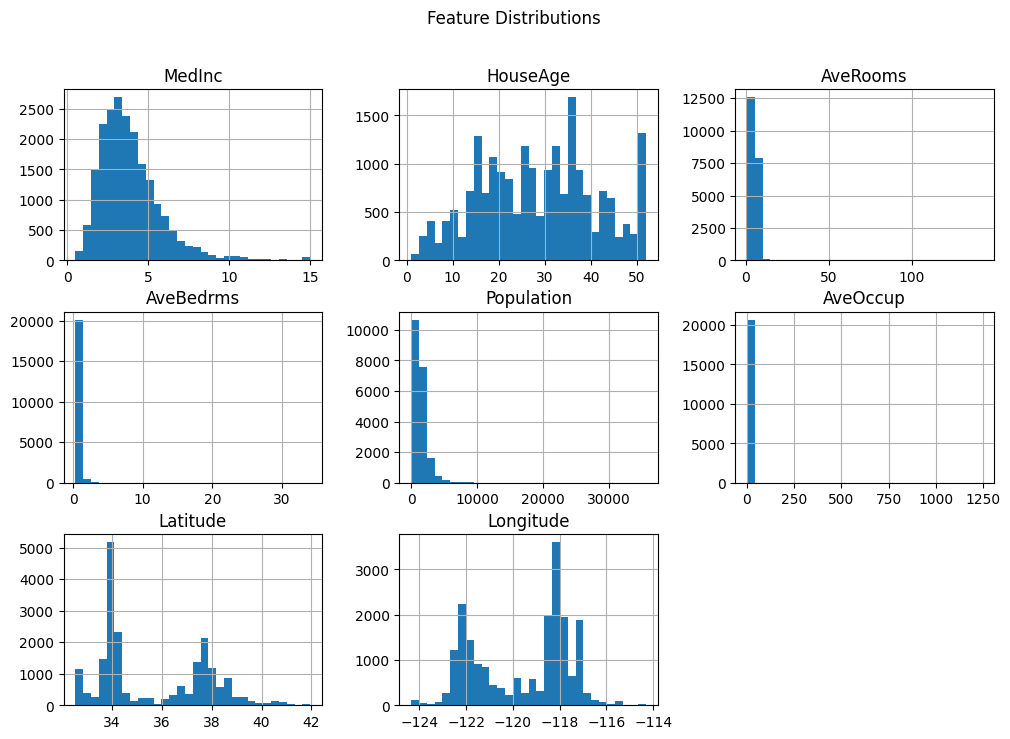

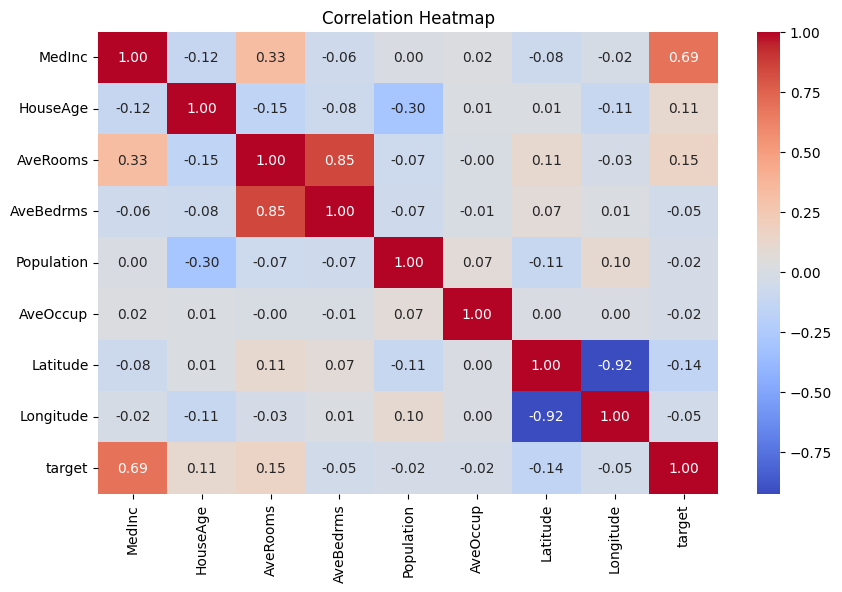

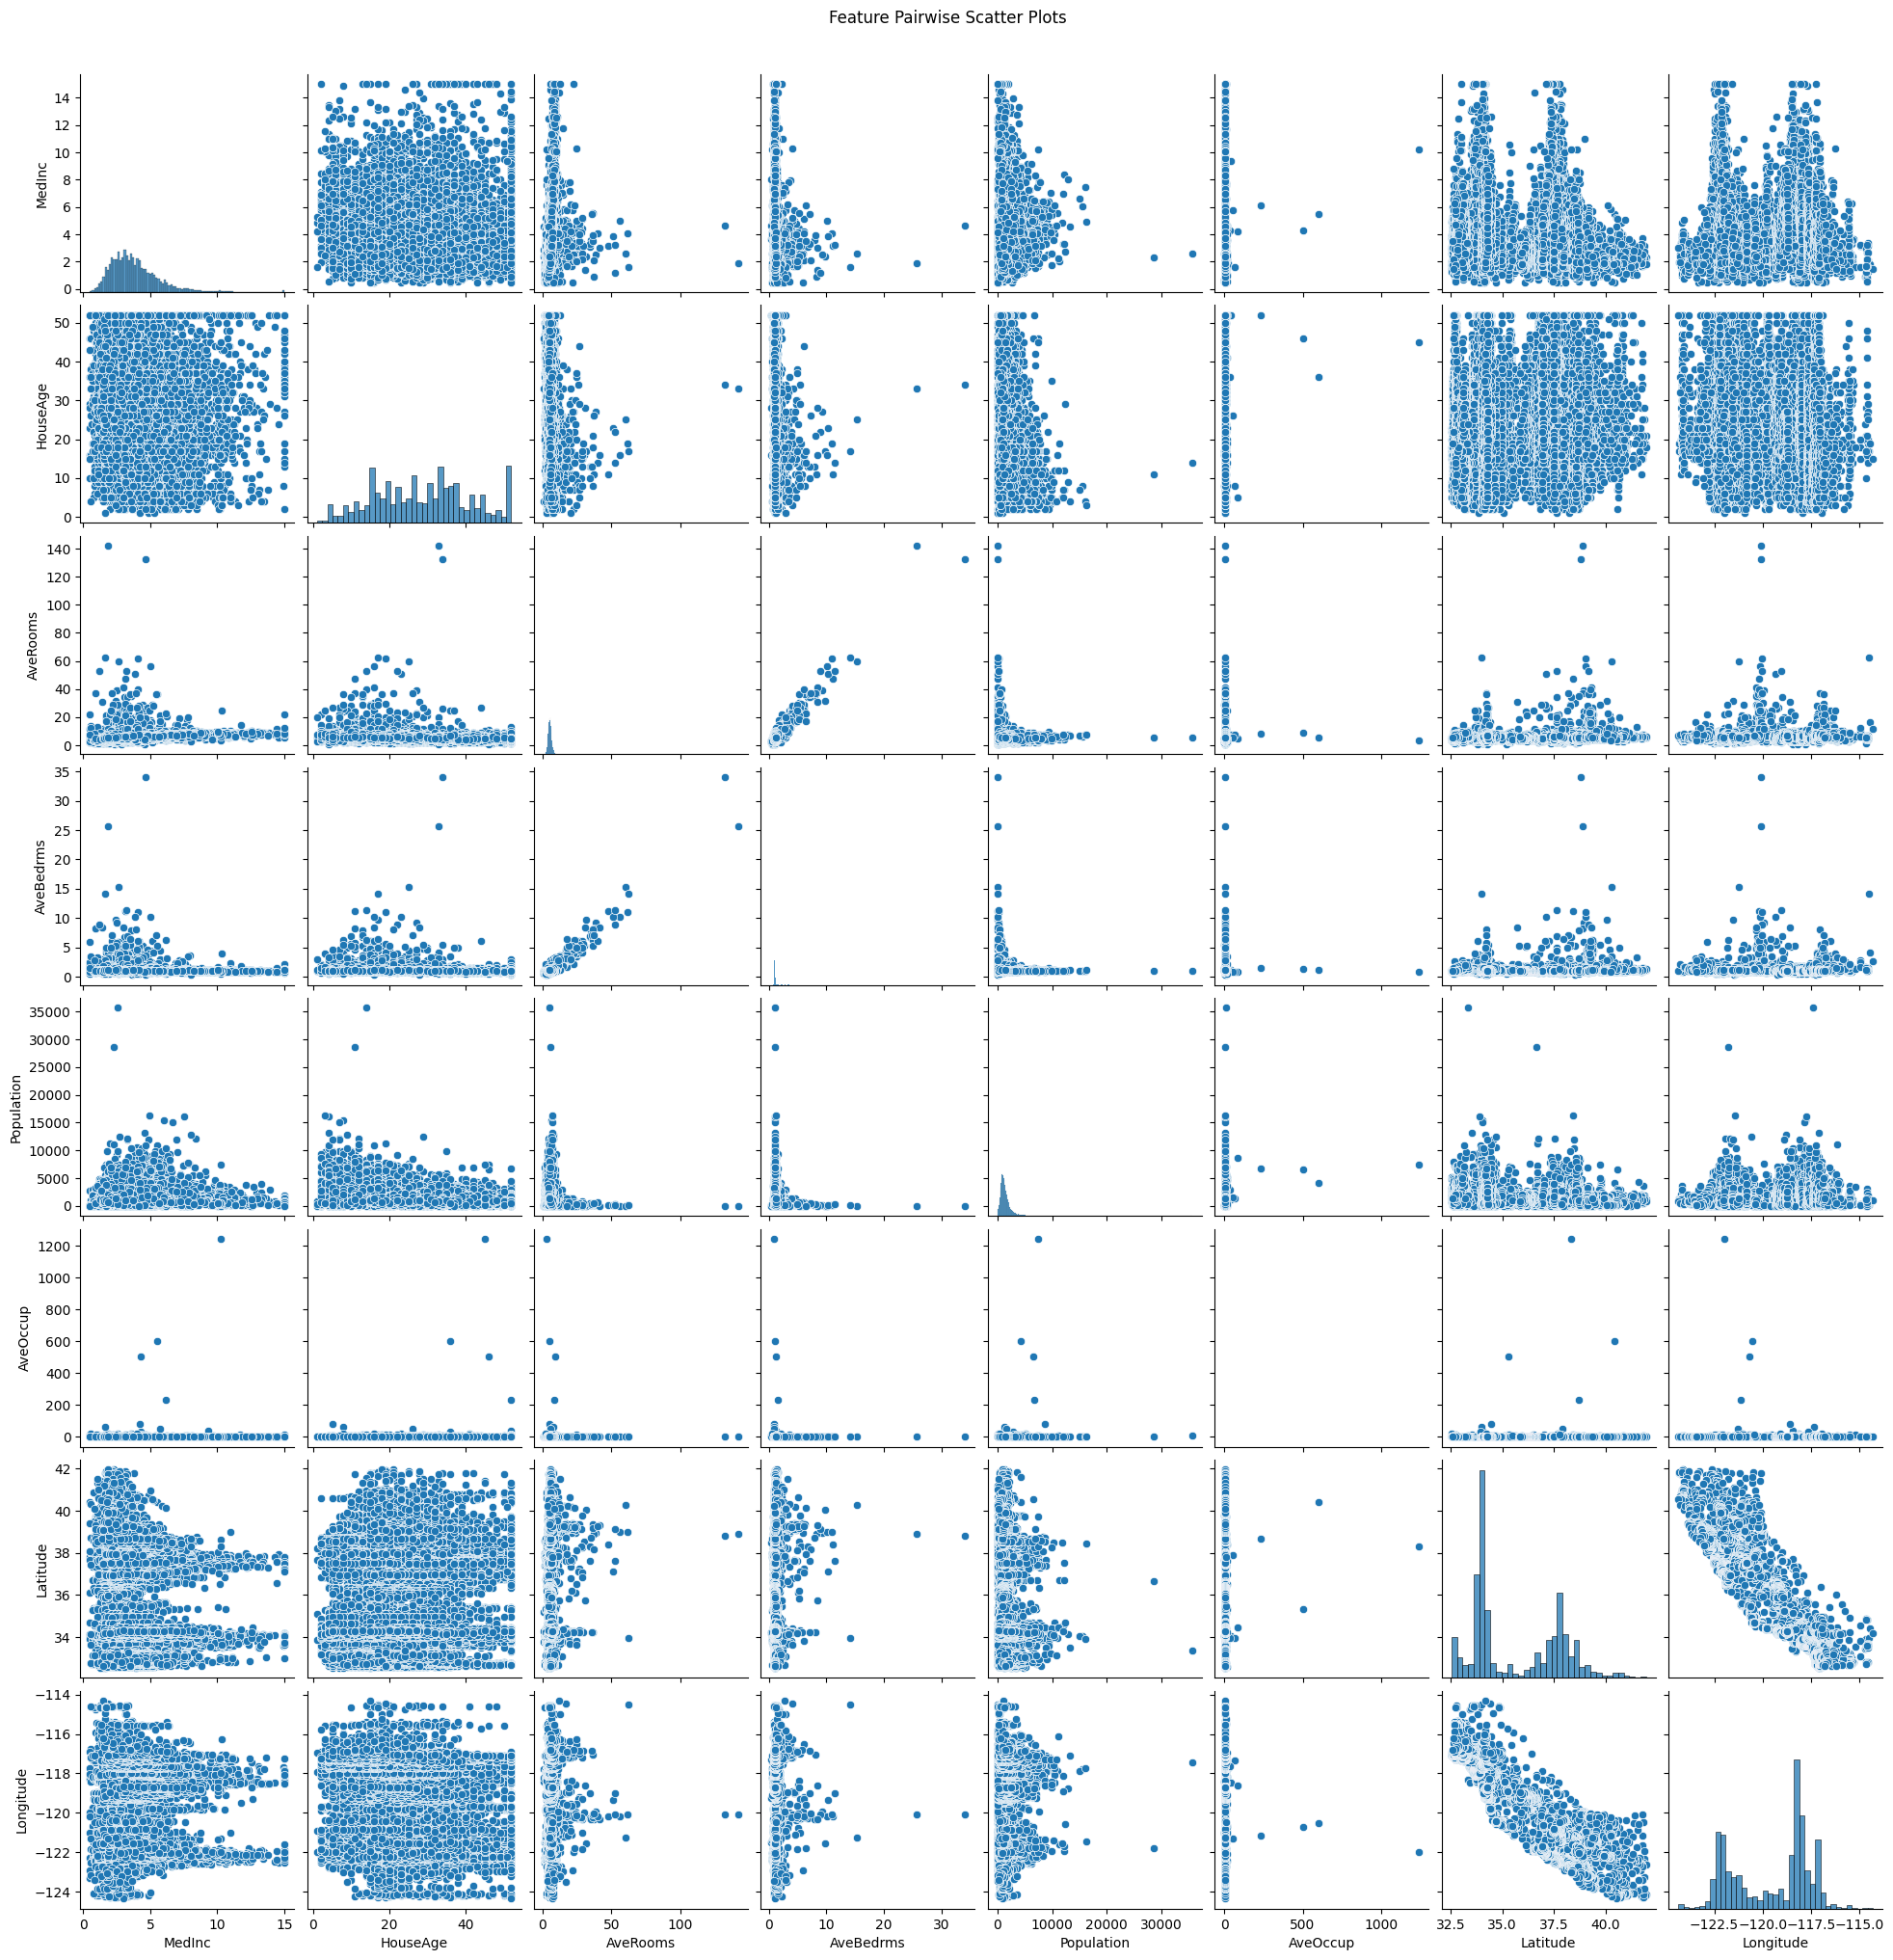

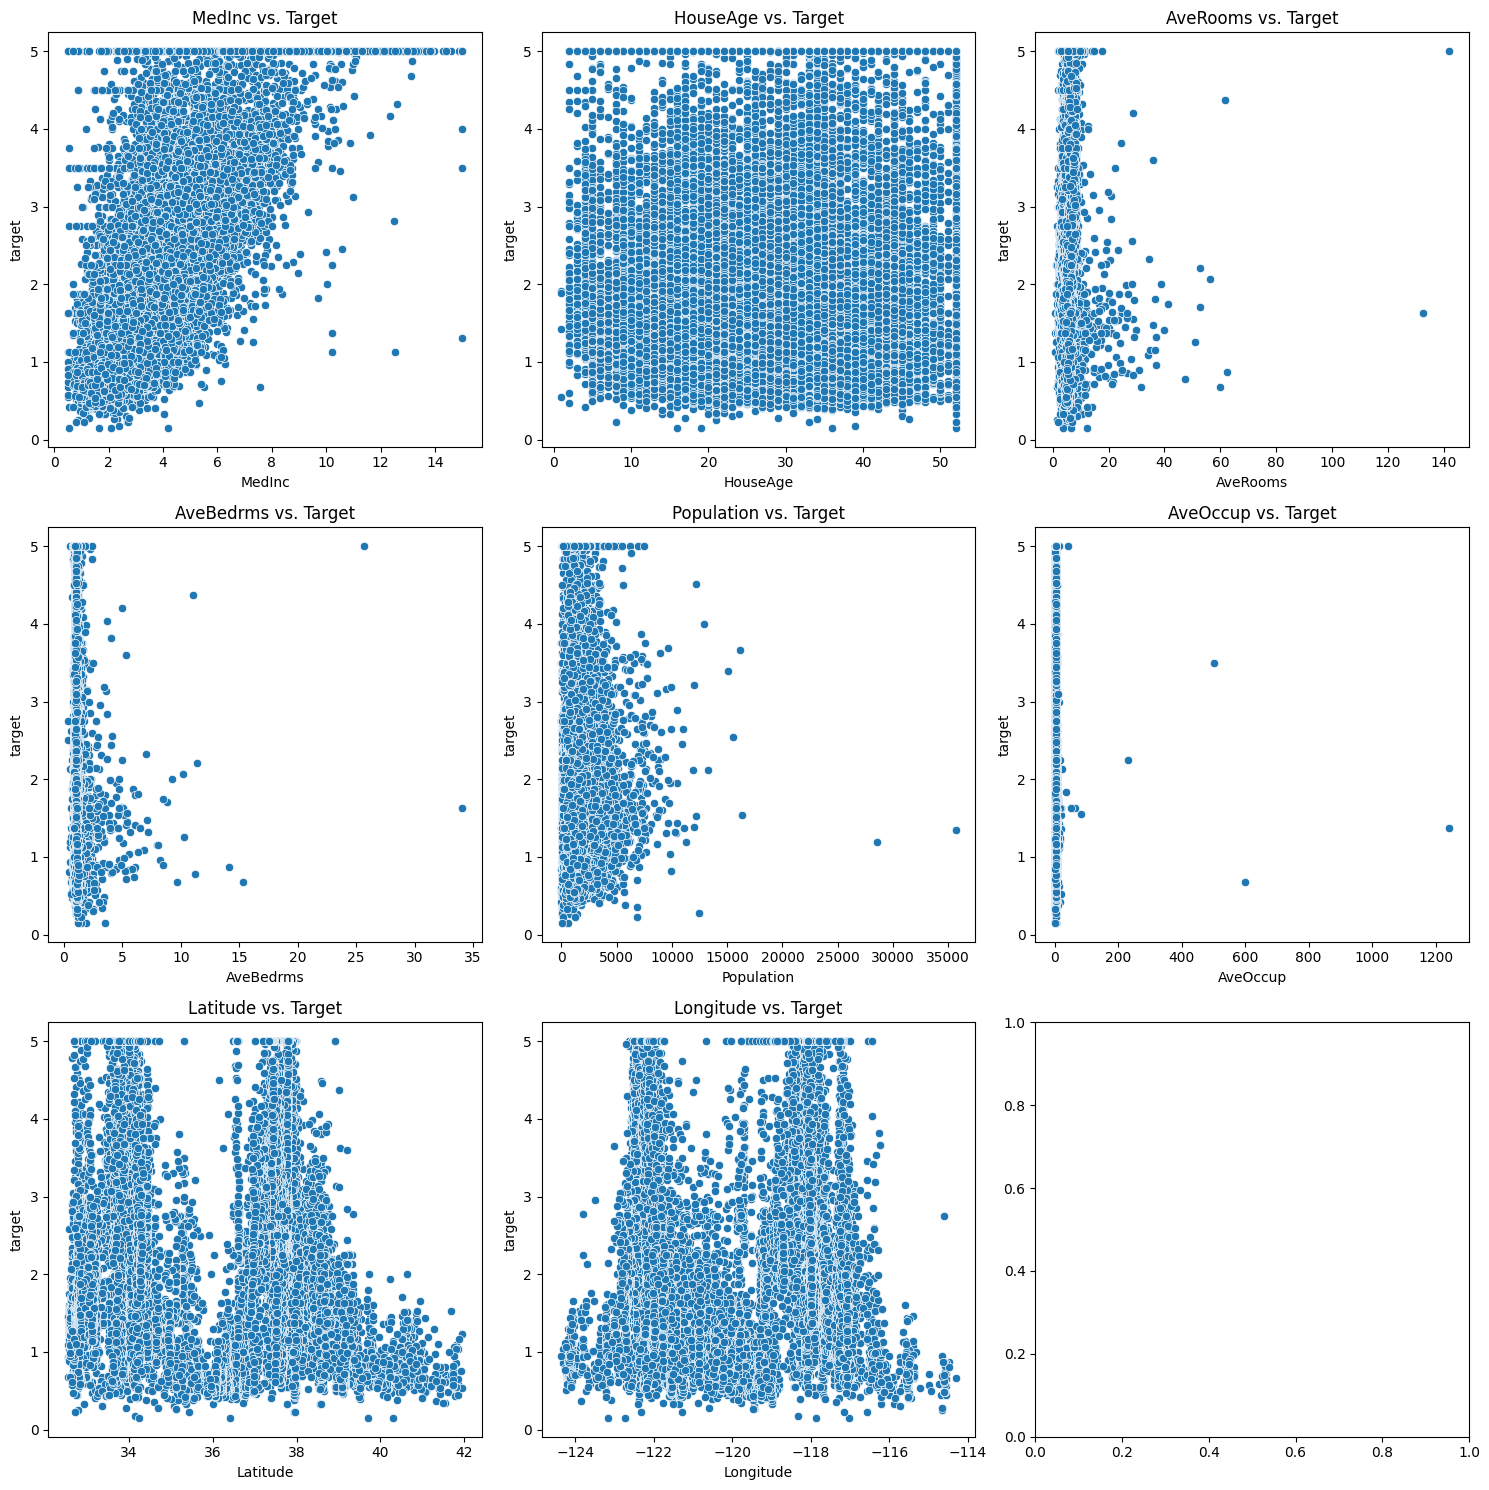

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.6134 - mae: 0.9545 - val_loss: 0.6935 - val_mae: 0.5859 - learning_rate: 0.0010
Epoch 2/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7454 - mae: 0.6526 - val_loss: 0.6177 - val_mae: 0.5421 - learning_rate: 0.0010
Epoch 3/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6273 - mae: 0.5914 - val_loss: 0.5148 - val_mae: 0.4942 - learning_rate: 0.0010
Epoch 4/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.5616 - mae: 0.5514 - val_loss: 0.5709 - val_mae: 0.5138 - learning_rate: 0.0010
Epoch 5/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.5278 - mae: 0.5334 - val_loss: 0.4259 - val_mae: 0.4454 - learning_rate: 0.0010
Epoch 6/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4894 - mae: 0.5114 - val_loss: 0.4299 - val_mae: 0.4469 - learning_rate: 0.0010
Epoch 7/30
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4800 - mae: 0.5081 - val_loss: 0.3930 - val_mae: 0.4310 - learning_rate: 0.0010
Epoch 8/30
516/51

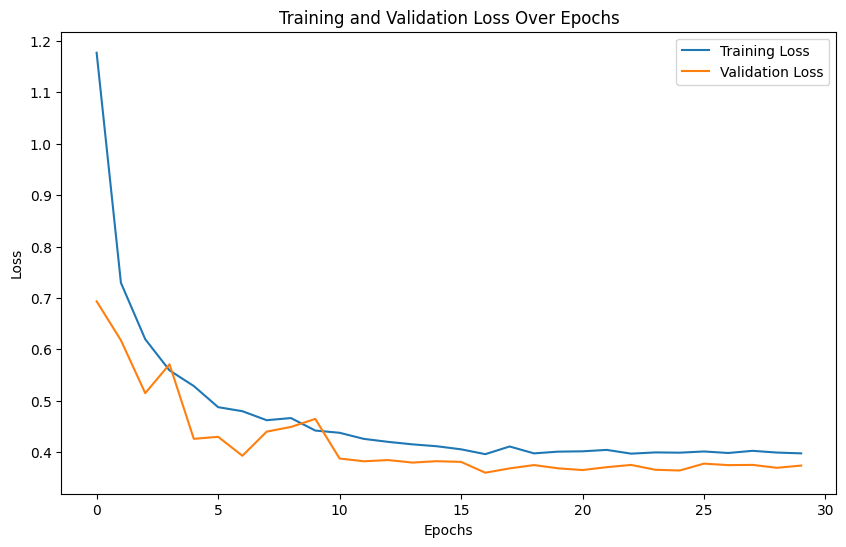

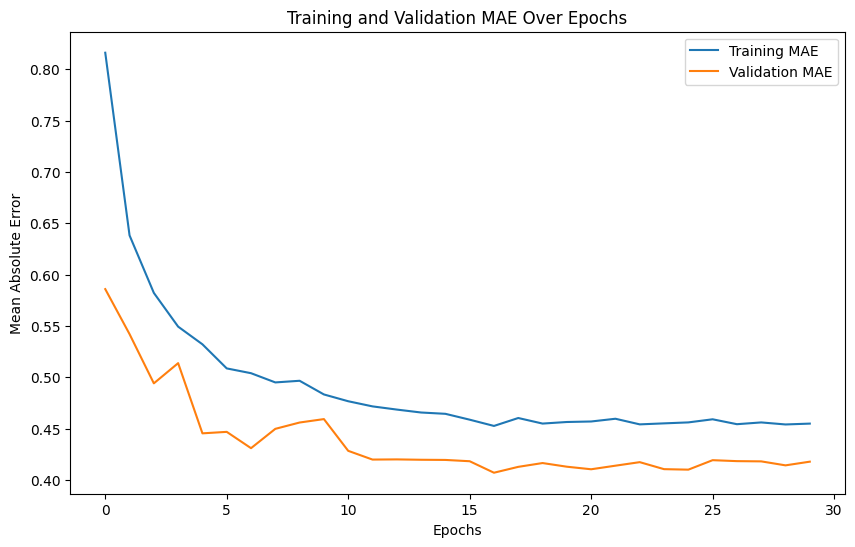

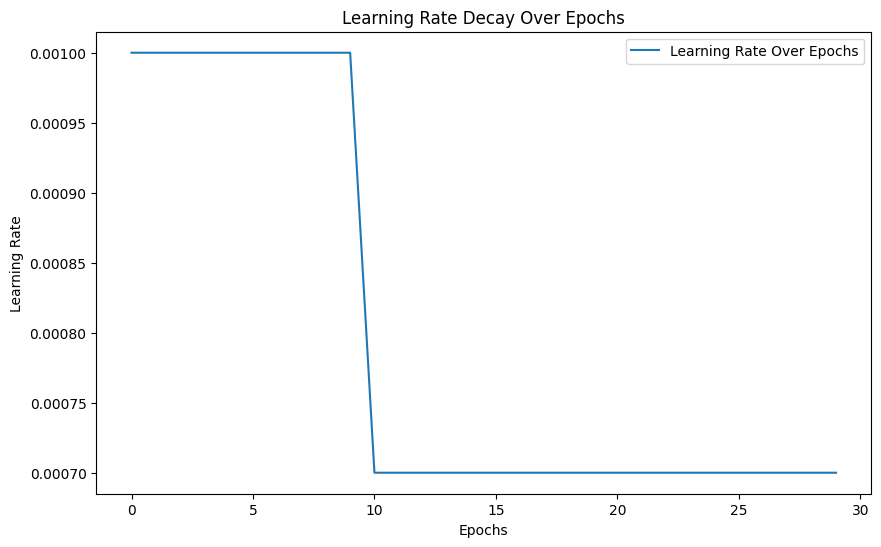

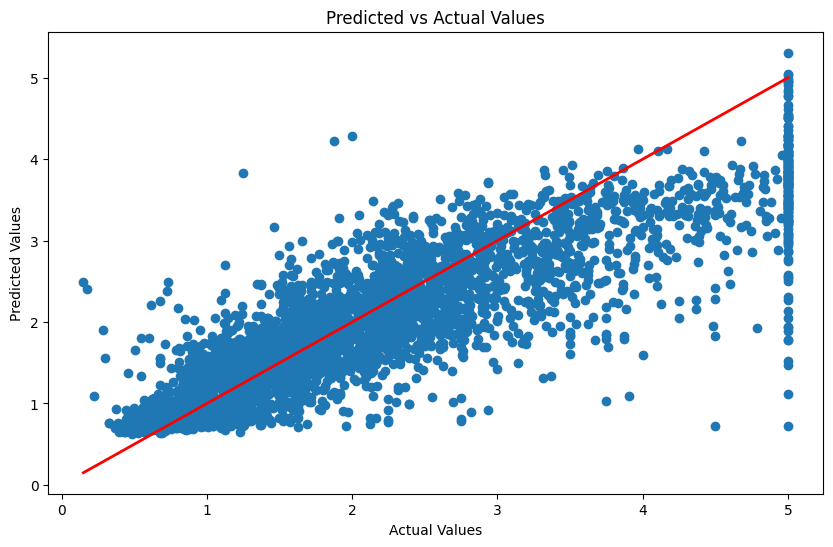

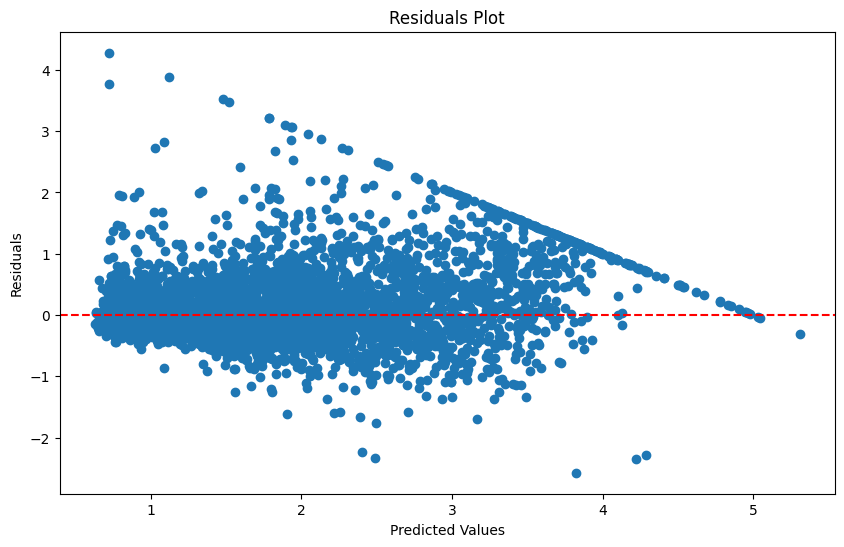

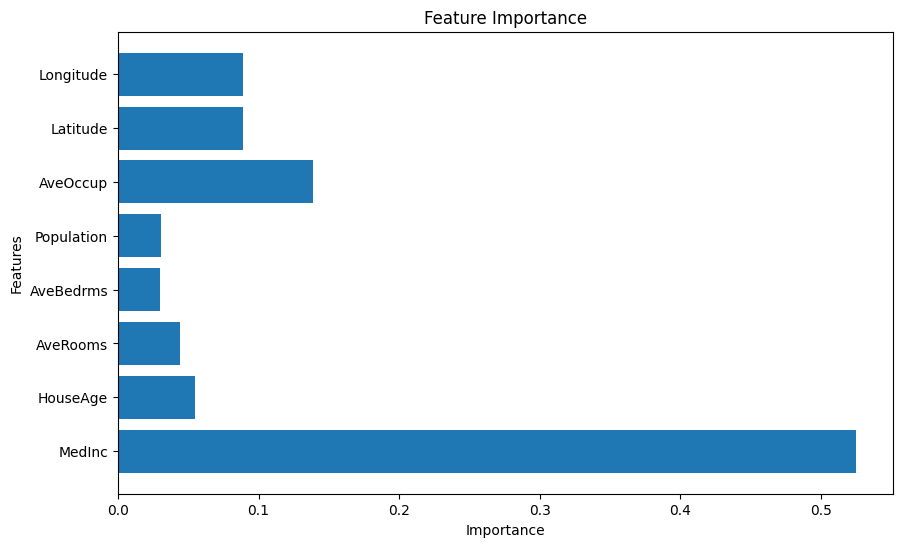

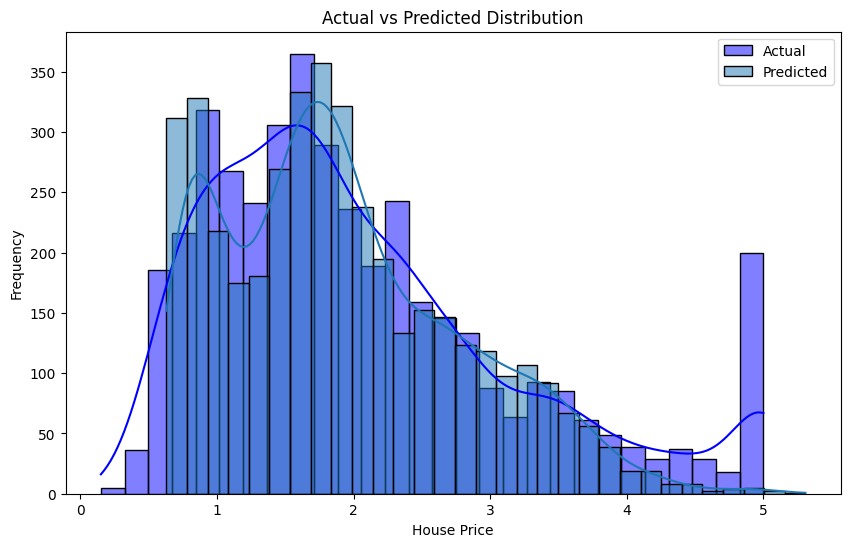

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the California Housing Dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Step 2: Exploratory Data Analysis (EDA)

# Visualizing the feature distribution
plt.figure(figsize=(10, 6))
df.drop('target', axis=1).hist(bins=30, figsize=(12, 8))
plt.suptitle('Feature Distributions')
plt.show()

# Correlation heatmap to identify the relationships between features
plt.figure(figsize=(10, 6))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot matrix to visualize relationships between features
sns.pairplot(df, vars=df.columns[:-1], height=2.5)
plt.suptitle('Feature Pairwise Scatter Plots', y=1.02)
plt.show()

# Plot target vs. each feature to analyze their impact on the target
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(x=df[feature], y=df['target'], ax=axes[i])
    axes[i].set_title(f'{feature} vs. Target')
plt.tight_layout()
plt.show()

# Step 3: Preprocess Data (Train-Test Split & Scaling)
X = df.drop('target', axis=1).values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 4: Define Model Architecture (Advanced Deep Learning)
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compiling the model with Adam optimizer
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Learning Rate Scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.7

lr_scheduler = LearningRateScheduler(scheduler)

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_scheduler])

# Step 6: Model Evaluation
y_pred = model.predict(X_test)

# Calculate RMSE and R2 score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print RMSE and R2 score
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")

# Step 7: Visualizations
# 1. Plotting the Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Plotting the Training and Validation MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# 3. Learning Rate Decay Plot
lr_rates = [scheduler(epoch, 0.001) for epoch in range(30)]
plt.figure(figsize=(10, 6))
plt.plot(lr_rates, label='Learning Rate Over Epochs')
plt.title('Learning Rate Decay Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

# 4. Predicted vs Actual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# ... (previous code) ...

# 5. Residuals Plot (Predictions - Actual Values)
residuals = y_test - y_pred.flatten() # Flatten y_pred to shape (4128,)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# ... (rest of the code) ...

# 6. Feature Importance Plot (using Random Forest for feature importance estimation)
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(df.columns[:-1], rf.feature_importances_)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# 7. Actual vs Predicted Distribution
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual', kde=True)
sns.histplot(y_pred, color='red', label='Predicted', kde=True)
plt.title('Actual vs Predicted Distribution')
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()
